### LPPLS Demo
https://github.com/Boulder-Investment-Technologies/lppls

In [ ]:
##RUN IF NEEDED (FIRST TIME)
## %pip install lppls
## %pip install xarray

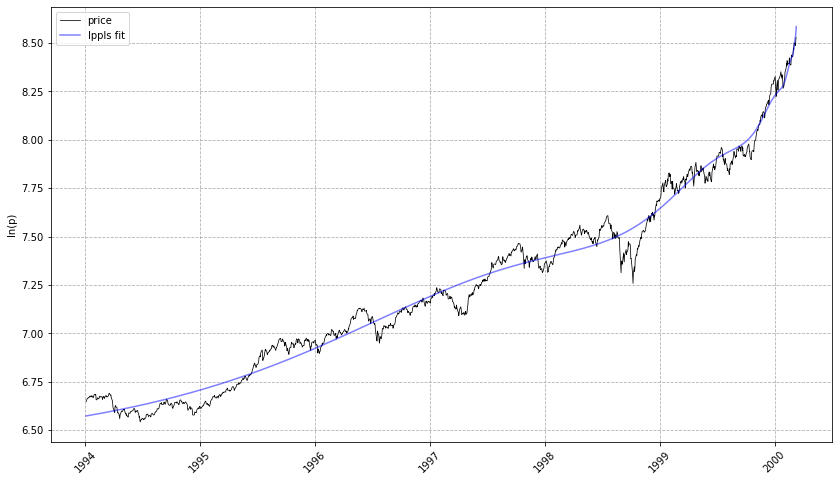

In [3]:
from lppls import lppls, data_loader
import numpy as np
import pandas as pd
from datetime import datetime as dt

import matplotlib.pyplot as plt

%matplotlib inline

# read example dataset into df 
data = data_loader.nasdaq_dotcom()

# convert time to ordinal
time = [pd.Timestamp.toordinal(dt.strptime(t1, '%Y-%m-%d')) for t1 in data['Date']]

# create list of observation data
price = np.log(data['Adj Close'].values)

# create observations array (expected format for LPPLS observations)
observations = np.array([time, price])

# set the max number for searches to perform before giving-up
# the literature suggests 25
MAX_SEARCHES = 25

# instantiate a new LPPLS model with the Nasdaq Dot-com bubble dataset
lppls_model = lppls.LPPLS(observations=observations)

# fit the model to the data and get back the params
tc, m, w, a, b, c, c1, c2, O, D = lppls_model.fit(MAX_SEARCHES)

# visualize the fit
lppls_model.plot_fit()




100%|██████████| 1444/1444 [12:12<00:00,  1.97it/s]


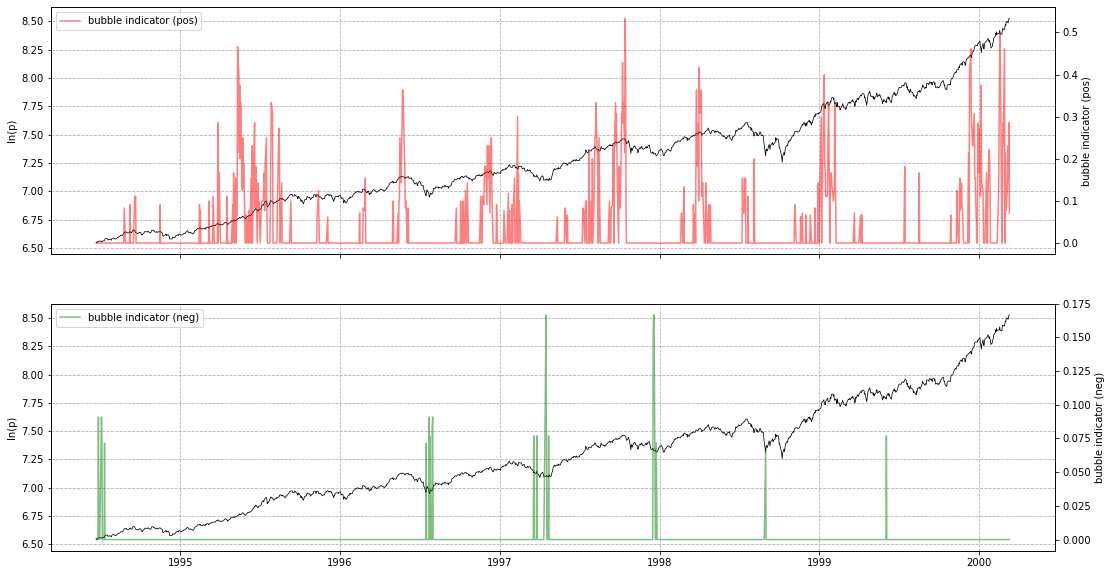

In [4]:
# compute the confidence indicator
res = lppls_model.mp_compute_nested_fits(
    workers=8,
    window_size=120, 
    smallest_window_size=30, 
    outer_increment=1, 
    inner_increment=5, 
    max_searches=25,
    # filter_conditions_config={} # not implemented in 0.6.x
)

lppls_model.plot_confidence_indicators(res)
# should give a plot like the following...

If you wish to store res as a pd.DataFrame, use compute_indicators.

Other Search Algorithms
Shu and Zhu (2019) proposed CMA-ES for identifying the best estimation of the three non-linear parameters (Critical Time, m, omega).

The CMA-ES rates among the most successful evolutionary algorithms for real-valued single-objective optimization and is typically applied to difficult nonlinear non-convex black-box optimization problems in continuous domain and search space dimensions between three and a hundred. Parallel computing is adopted to expedite the fitting process drastically.

This approach has been implemented in a subclass and can be used as follows... Thanks to @paulogonc for the code.

In [ ]:
from lppls import lppls_cmaes
lppls_model = lppls_cmaes.LPPLSCMAES(observations=observations)
tc, m, w, a, b, c, c1, c2, O, D = lppls_model.fit(max_iteration=2500, pop_size=4)